In [18]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import pygal 
import cairosvg
import os

In [3]:
df = pd.read_csv('point.csv', encoding = "cp1252")

In [ ]:
# df.tail()

In [ ]:
# df[df['headline'].str.lower().str.contains(("seed funding|seed round|seed capital"))]
# df[df['headline'].str.lower().str.contains(("(?x)usd | USD"))]

### All steps in a function

In [4]:
def stabilize(df):
    df['date'] = pd.to_datetime(df['date'])
    df['months'] = df['date'].apply(lambda x: x.strftime('%Y-%m')) 
    df['count'] = 1    

In [5]:
stabilize(df)

In [6]:
funding = df[df['headline'].str.lower().str.contains('raises|raised|raising|secures|closes|secured|closed')]
acquisition = df[df['headline'].str.lower().str.contains(("acquiring|acquired|acquiring|acquires"))]

In [ ]:
# chart = df.groupby('months', as_index=False)['date'].count()
# line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
# line_chart.title = 'title'
# line_chart.x_labels = map(str, chart['months'])
# line_chart.x_labels_major = [chart['months'][0], chart['months'][10], chart['months'][20], chart['months'][30], chart['months'][40], chart['months'][50], chart['months'][57], chart['months'][65]]
# line_chart.add('',chart['date'])
# display({'image/svg+xml': line_chart.render()}, raw=True)

In [19]:
path = './Output'
os.chdir(path)

In [7]:
def createChart(df, title, fileName):
    chart = df.groupby('months', as_index=False)['date'].count()
    l = int(len(chart)/7)
    line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
    line_chart.title = title
    line_chart.x_labels = map(str, chart['months'])
    line_chart.x_labels_major = [chart['months'][0], chart['months'][l], chart['months'][l+l], chart['months'][l+l+l], chart['months'][l+l+l+l], chart['months'][l+l+l+l+l], chart['months'][l+l+l+l+l+l], chart['months'][len(chart) - 1]]
    line_chart.add('', chart['date'])
    
    line_chart.render_to_png( fileName + '.png')
    
#     drawing = svg2rlg('draws.svg')
#     renderPM.drawToFile(drawing, 'rer.png')
    display({'image/svg+xml': line_chart.render()}, raw=True)

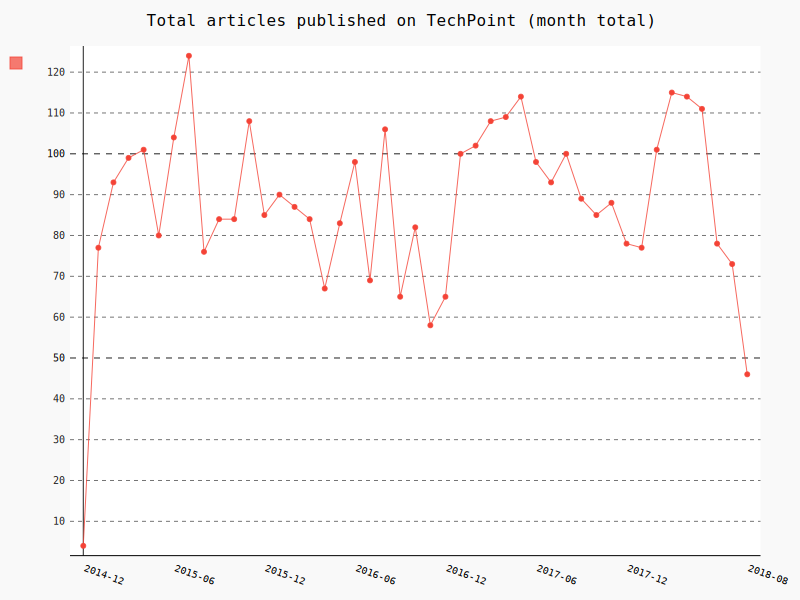

In [8]:
createChart(df, 'Total articles published on TechPoint (month total)', 'Total Articles Point' )

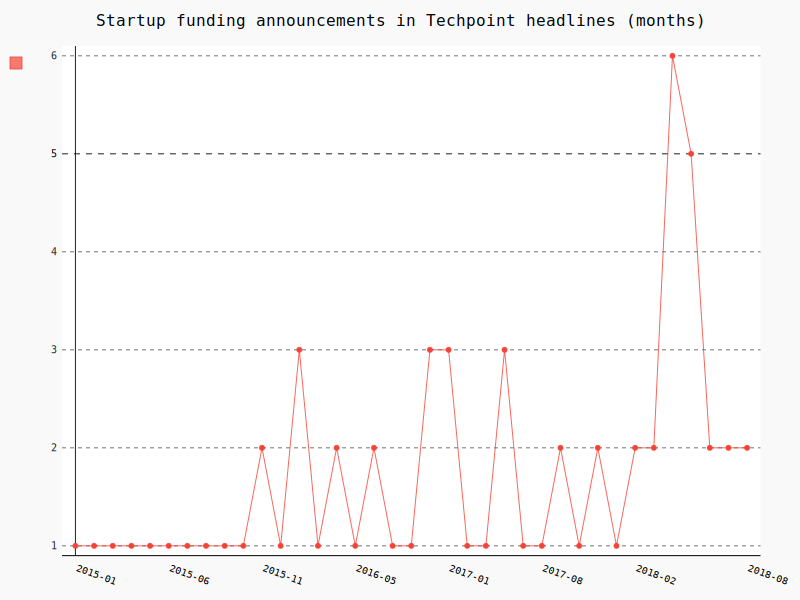

In [9]:
createChart(funding, 'Startup funding announcements in Techpoint headlines (months)', 'funding announcement point')

In [ ]:
createChart(acquisition, 'Startup acquisiton announcements in Techcabal headlines', '')

In [35]:
spons = df[df['sponsored'] == True]

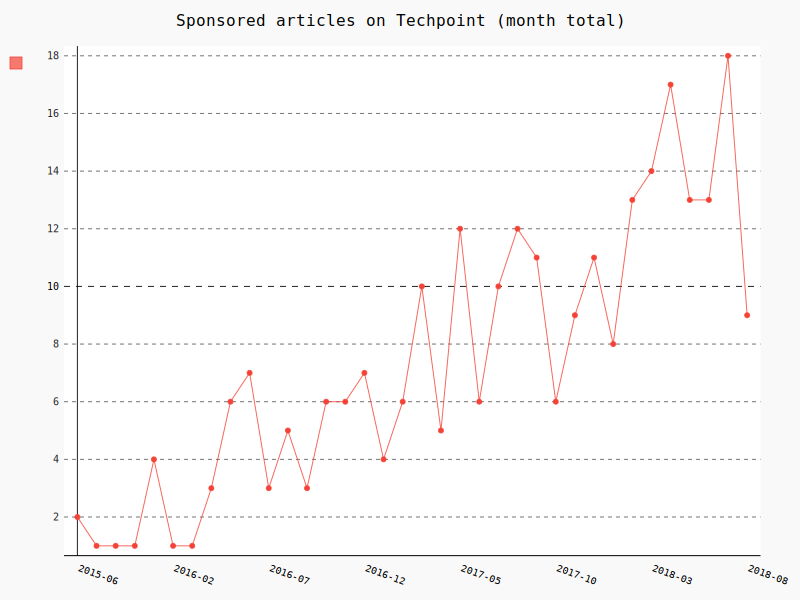

In [36]:
createChart(spons, 'Sponsored articles on Techpoint (month total)', 'sponsored techpoint')

## Other Analysis

##### Highest no of article churned out per month

In [13]:
df.groupby('months', as_index=False)['count'].count()['count'].max()

124

In [ ]:
##### Published articles by year

In [14]:
df.groupby(df.date.dt.year)['count'].sum()

date
2014       4
2015    1115
2016     954
2017    1164
2018     715
Name: count, dtype: int64

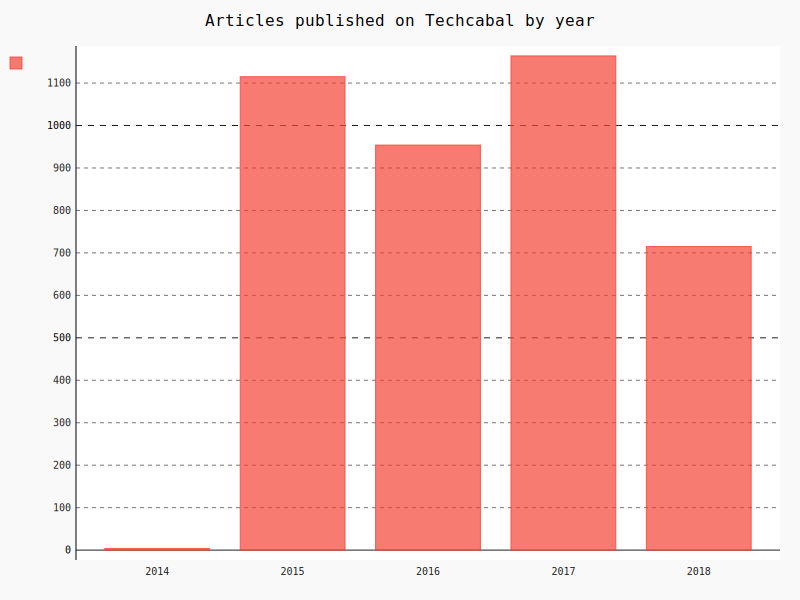

In [20]:
bar_chart = pygal.Bar()
bar_chart.title = 'Articles published on Techcabal by year'
bar_chart.x_labels = map(str, range(2014, 2019))
bar_chart.add('', [4, 1115, 954, 1164, 715])
display({'image/svg+xml': bar_chart.render()}, raw=True)
bar_chart.render_to_png('year articles point.png')

In [32]:
# df.groupby('months', as_index=False)['date'].max()

In [ ]:
# funding.groupby('months')['count'].sum()

In [10]:
# https://techcabal.com/2015/02/16/
# https://techcabal.com/2015/02/10/


In [2]:
len(funding)

NameError: name 'funding' is not defined

In [36]:
# funding.groupby('months', as_index=False)['count'].count()

In [26]:
funding.head()

,Unnamed: 0,date,headline,sponsored,months,count
22,22,2018-08-10 19:29:21,Mines secures $13m to expand its digital credi...,False,2018-08,1
38,38,2018-08-01 17:23:12,"Nigerian energy startup, Rensource secures €50...",False,2018-08,1
80,80,2018-07-16 09:00:14,"Advertising startup, TaxiTV raises seed fund f...",False,2018-07,1
94,94,2018-07-10 09:02:12,“Nigerian startups raised $73.6 million in Q2 ...,False,2018-07,1
116,116,2018-06-29 12:00:30,Logistics startup Kobo360 raises $1.2 million ...,False,2018-06,1


In [13]:
amount = funding[funding['headline'].str.lower().str.contains('million')]

In [15]:
amount.groupby(df.date.dt.year)['count'].sum()

date
2015    5
2016    7
2017    3
2018    7
Name: count, dtype: int64

##### Percent of sponsored articles to all articles

In [21]:
groupedSpons = spons.groupby('months', as_index=False)['sponsored'].count()
groupedAll = df.groupby('months', as_index=False)['date'].count()
merged = groupedAll.merge(groupedSpons, on='months')
merged['percent'] = merged['sponsored'] / merged['date']

In [38]:
merged.tail()

,months,date,sponsored,percent,percent prop
31,2018-04,114,17,0.149123,15%
32,2018-05,111,13,0.117117,12%
33,2018-06,78,13,0.166667,17%
34,2018-07,73,18,0.246575,25%
35,2018-08,46,9,0.195652,20%


In [26]:
from numbers import Number
def asPercent(v, precision='0.0'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

merged['percent prop'] = merged['percent'].apply(asPercent)

In [50]:
line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False, max_scale=6)
l = int(len(merged)/7)
line_chart.title = '% of sponsored articles relative to total monthly articles (Techpoint)'
line_chart.y_labels = ['4%', '8%', '12%', '16%', '20%', '24%']
# line_chart.y_labels = [# line_chart.y_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
line_chart.x_labels = map(str, merged['months'])
line_chart.x_labels_major = [merged['months'][0], merged['months'][l], merged['months'][l+l], merged['months'][l+l+l], merged['months'][l+l+l+l], merged['months'][l+l+l+l+l], merged['months'][l+l+l+l+l+l], merged['months'][len(merged) - 1]]
line_chart.add('',merged['percent'])
line_chart.render_to_png( 'percent of sponsored point.png')

In [34]:
merged.tail()

,months,date,sponsored,percent,percent prop
31,2018-04,114,17,0.149123,15%
32,2018-05,111,13,0.117117,12%
33,2018-06,78,13,0.166667,17%
34,2018-07,73,18,0.246575,25%
35,2018-08,46,9,0.195652,20%
